# 백테스트 02 - 종목 수익률과 시각화

<img src="https://i.imgur.com/a8aQaXM.jpg" >
   
#### 2018-2019 [FinanceData.KR]()

## 기본 설정

In [0]:
!pip install -q finance-datareader

In [0]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (16,8)

# 가격 데이터

In [3]:
import FinanceDataReader as fdr

# 셀트리온(068270), 2017년 가격
df = fdr.DataReader('068270', '2017-01-01', '2017-12-31')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,105503,106189,104522,106091,433573,0.007445
2017-01-03,105600,106090,104031,104523,382069,-0.014780
2017-01-04,104914,104914,103051,104032,349978,-0.004698
2017-01-05,104325,105404,103737,104327,312028,0.002836
2017-01-06,103836,104228,102953,103248,277541,-0.010342


In [4]:
len(df)

243

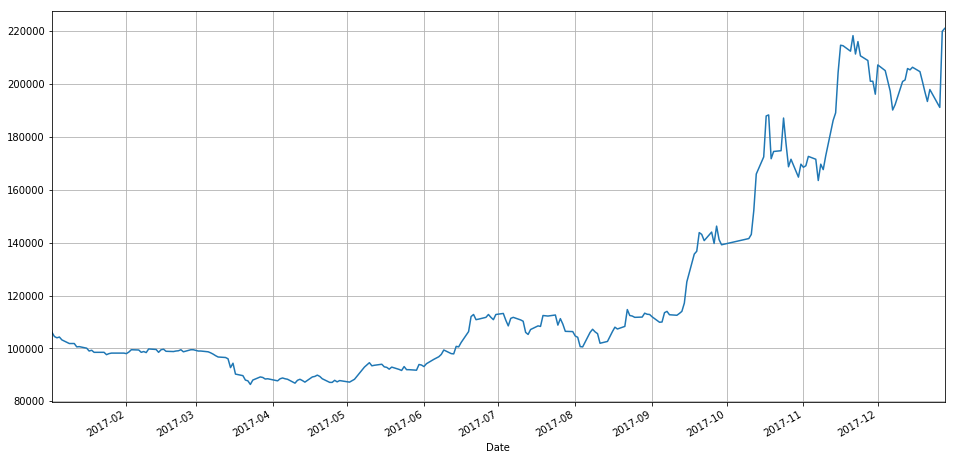

In [5]:
# 일반적으로 종가(Close)를 가격으로 사용

df['Close'].plot()

In [6]:
# 처음가격, 나중가격

처음가격, 나중가격 = df['Close'][0], df['Close'][-1]
처음가격, 나중가격

(106091, 221100)

In [7]:
#  최종 수익률(1년) - 퍼센티지 수익률

(나중가격 - 처음가격) / 처음가격

1.0840599108312674

# 일반 수익률

In [8]:
chg = df['Close'].pct_change()
chg.head(10)

Date
2017-01-02         NaN
2017-01-03   -0.014780
2017-01-04   -0.004698
2017-01-05    0.002836
2017-01-06   -0.010342
2017-01-09   -0.013298
2017-01-10    0.000000
2017-01-11    0.000000
2017-01-12   -0.012506
2017-01-13    0.000974
Name: Close, dtype: float64

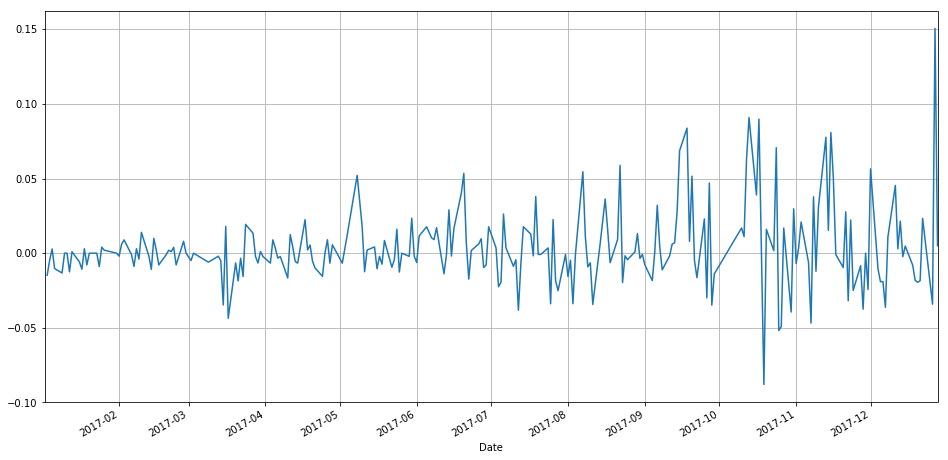

In [9]:
# 일일 수익률
chg.plot()

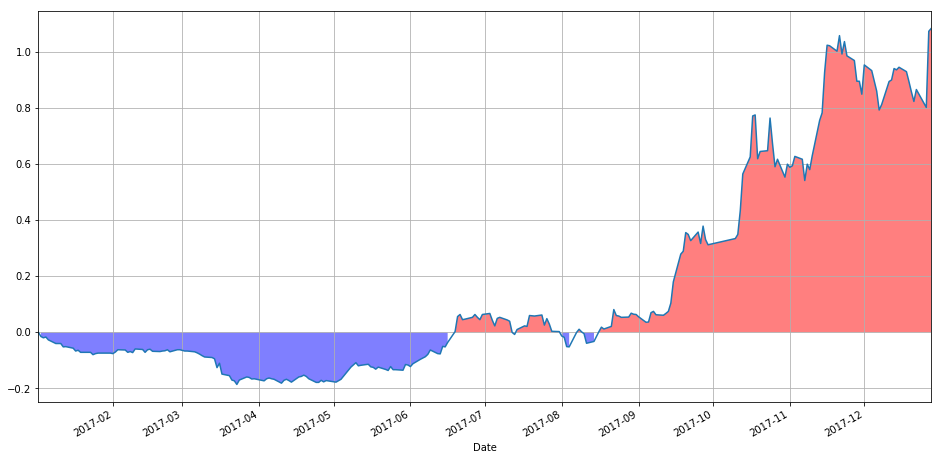

In [10]:
# 일일 누적 수익률
# 차트 그리기 참고: https://financedata.github.io/posts/faq_matplotlib_fill_chart.html

pct_ret = chg = df['Close'].pct_change().fillna(0).add(1).cumprod().sub(1)
pct_ret.plot()
plt.fill_between(pct_ret.index, 0, pct_ret, where=pct_ret >= 0, facecolor='red', alpha=0.5)
plt.fill_between(pct_ret.index, 0, pct_ret, where=pct_ret < 0, facecolor='blue', alpha=0.5)

In [11]:
# 최종 수익률: +108.4%

pct_ret[-1]

1.0840599108312685

## 로그 수익률

In [12]:
import numpy as np

log_chg = np.log(df['Close'] / df['Close'].shift(1))
log_chg.head(10)

Date
2017-01-02         NaN
2017-01-03   -0.014890
2017-01-04   -0.004709
2017-01-05    0.002832
2017-01-06   -0.010396
2017-01-09   -0.013387
2017-01-10    0.000000
2017-01-11    0.000000
2017-01-12   -0.012584
2017-01-13    0.000974
Name: Close, dtype: float64

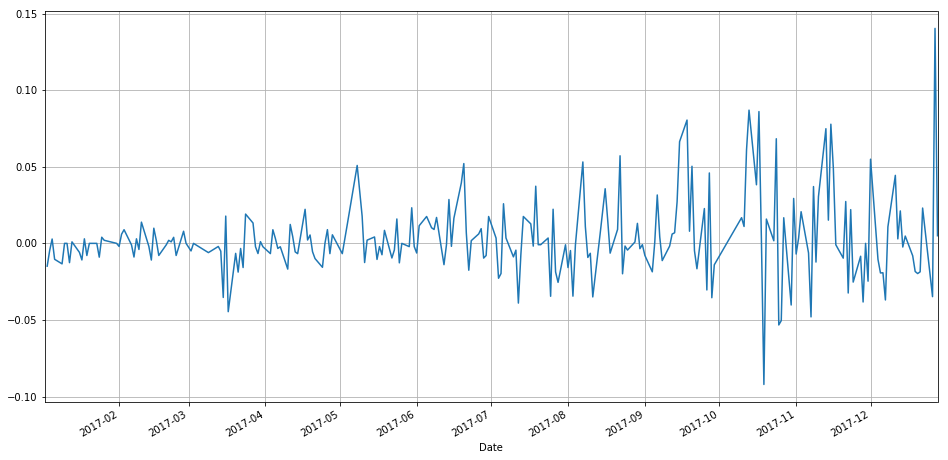

In [13]:
log_chg.plot()

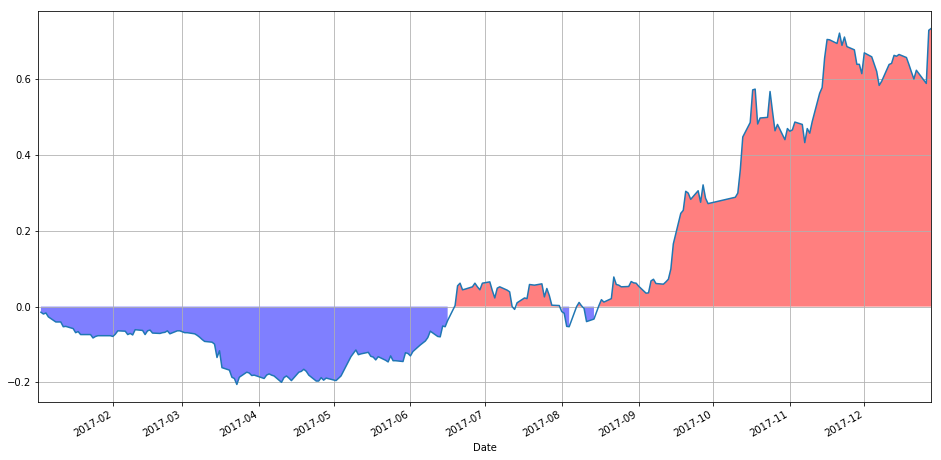

In [14]:
# 단순히 누적 덧셈(cumsum)으로 기간 수익률을 구할 수 있습니다
log_ret = log_chg.cumsum()
log_ret.plot()
plt.fill_between(log_ret.index, 0, log_ret, where=log_ret >= 0, facecolor='red', alpha=0.5)
plt.fill_between(log_ret.index, 0, log_ret, where=log_ret < 0, facecolor='blue', alpha=0.5)

In [15]:
# 최종 수익률: 72.2% (로그수익률은 실제 수익률 보다 다소 작게 나타난다)

log_ret[-1]

0.7343178714775529

누적 로그 수익률을 수익률 환산하려면 exp을 적용하고 1.0을 빼줍니다

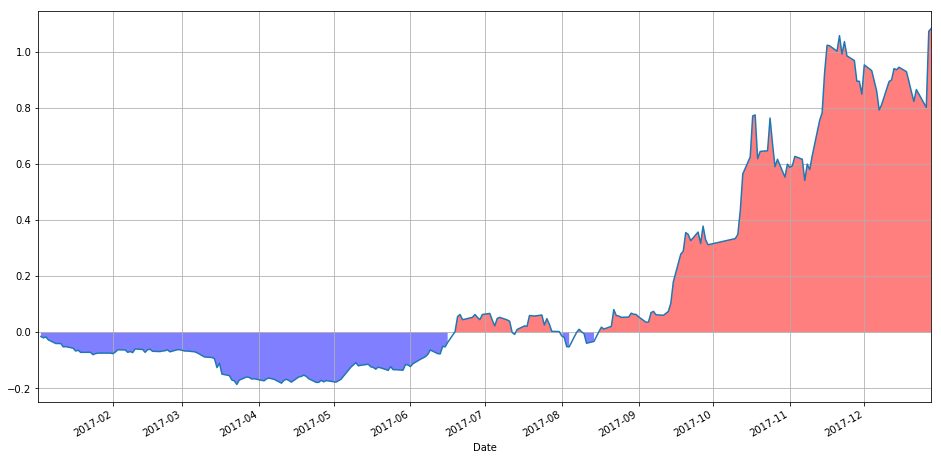

In [16]:
ret = log_ret.apply(np.exp) - 1.0
ret.plot()
plt.fill_between(ret.index, 0, ret, where=ret >= 0, facecolor='red', alpha=0.5)
plt.fill_between(ret.index, 0, ret, where=ret < 0, facecolor='blue', alpha=0.5)

In [17]:
# 최종 수익률 105.8%

ret[-1]

1.0840599108312667

# 리뷰
* df['Close'].pct_change()
* 로그수익률 = ln(나중가격/처음가격)
* log_chg = np.log(df['Close'] / df['Close'].shift(1))
* 로그 누적수익률 log_chg.cumsum() 
* 최종 누적수익률 log_ret.cumsum()[-1]

#### 2018-2019 [FinanceData.KR]()